In [43]:
import kaggle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_predict , GridSearchCV ,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### About the dataset
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### **Data loading** 

In [3]:
!kaggle datasets download uciml/pima-indians-diabetes-database -f diabetes.csv

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
diabetes.csv: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Ascentt\Udemy Course\diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Exploratory Data Analysis**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
for i in df.columns:
    print(i,':',df[i].nunique())

Pregnancies : 17
Glucose : 136
BloodPressure : 47
SkinThickness : 51
Insulin : 186
BMI : 248
DiabetesPedigreeFunction : 517
Age : 52
Outcome : 2


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.shape

(768, 9)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

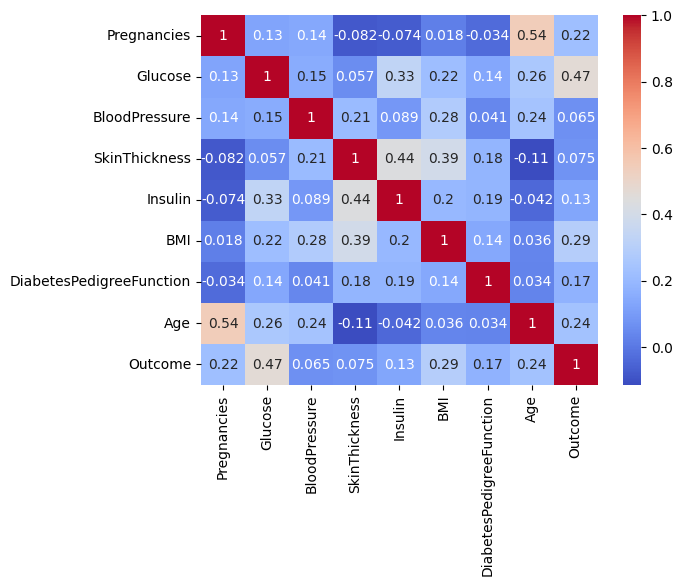

In [11]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

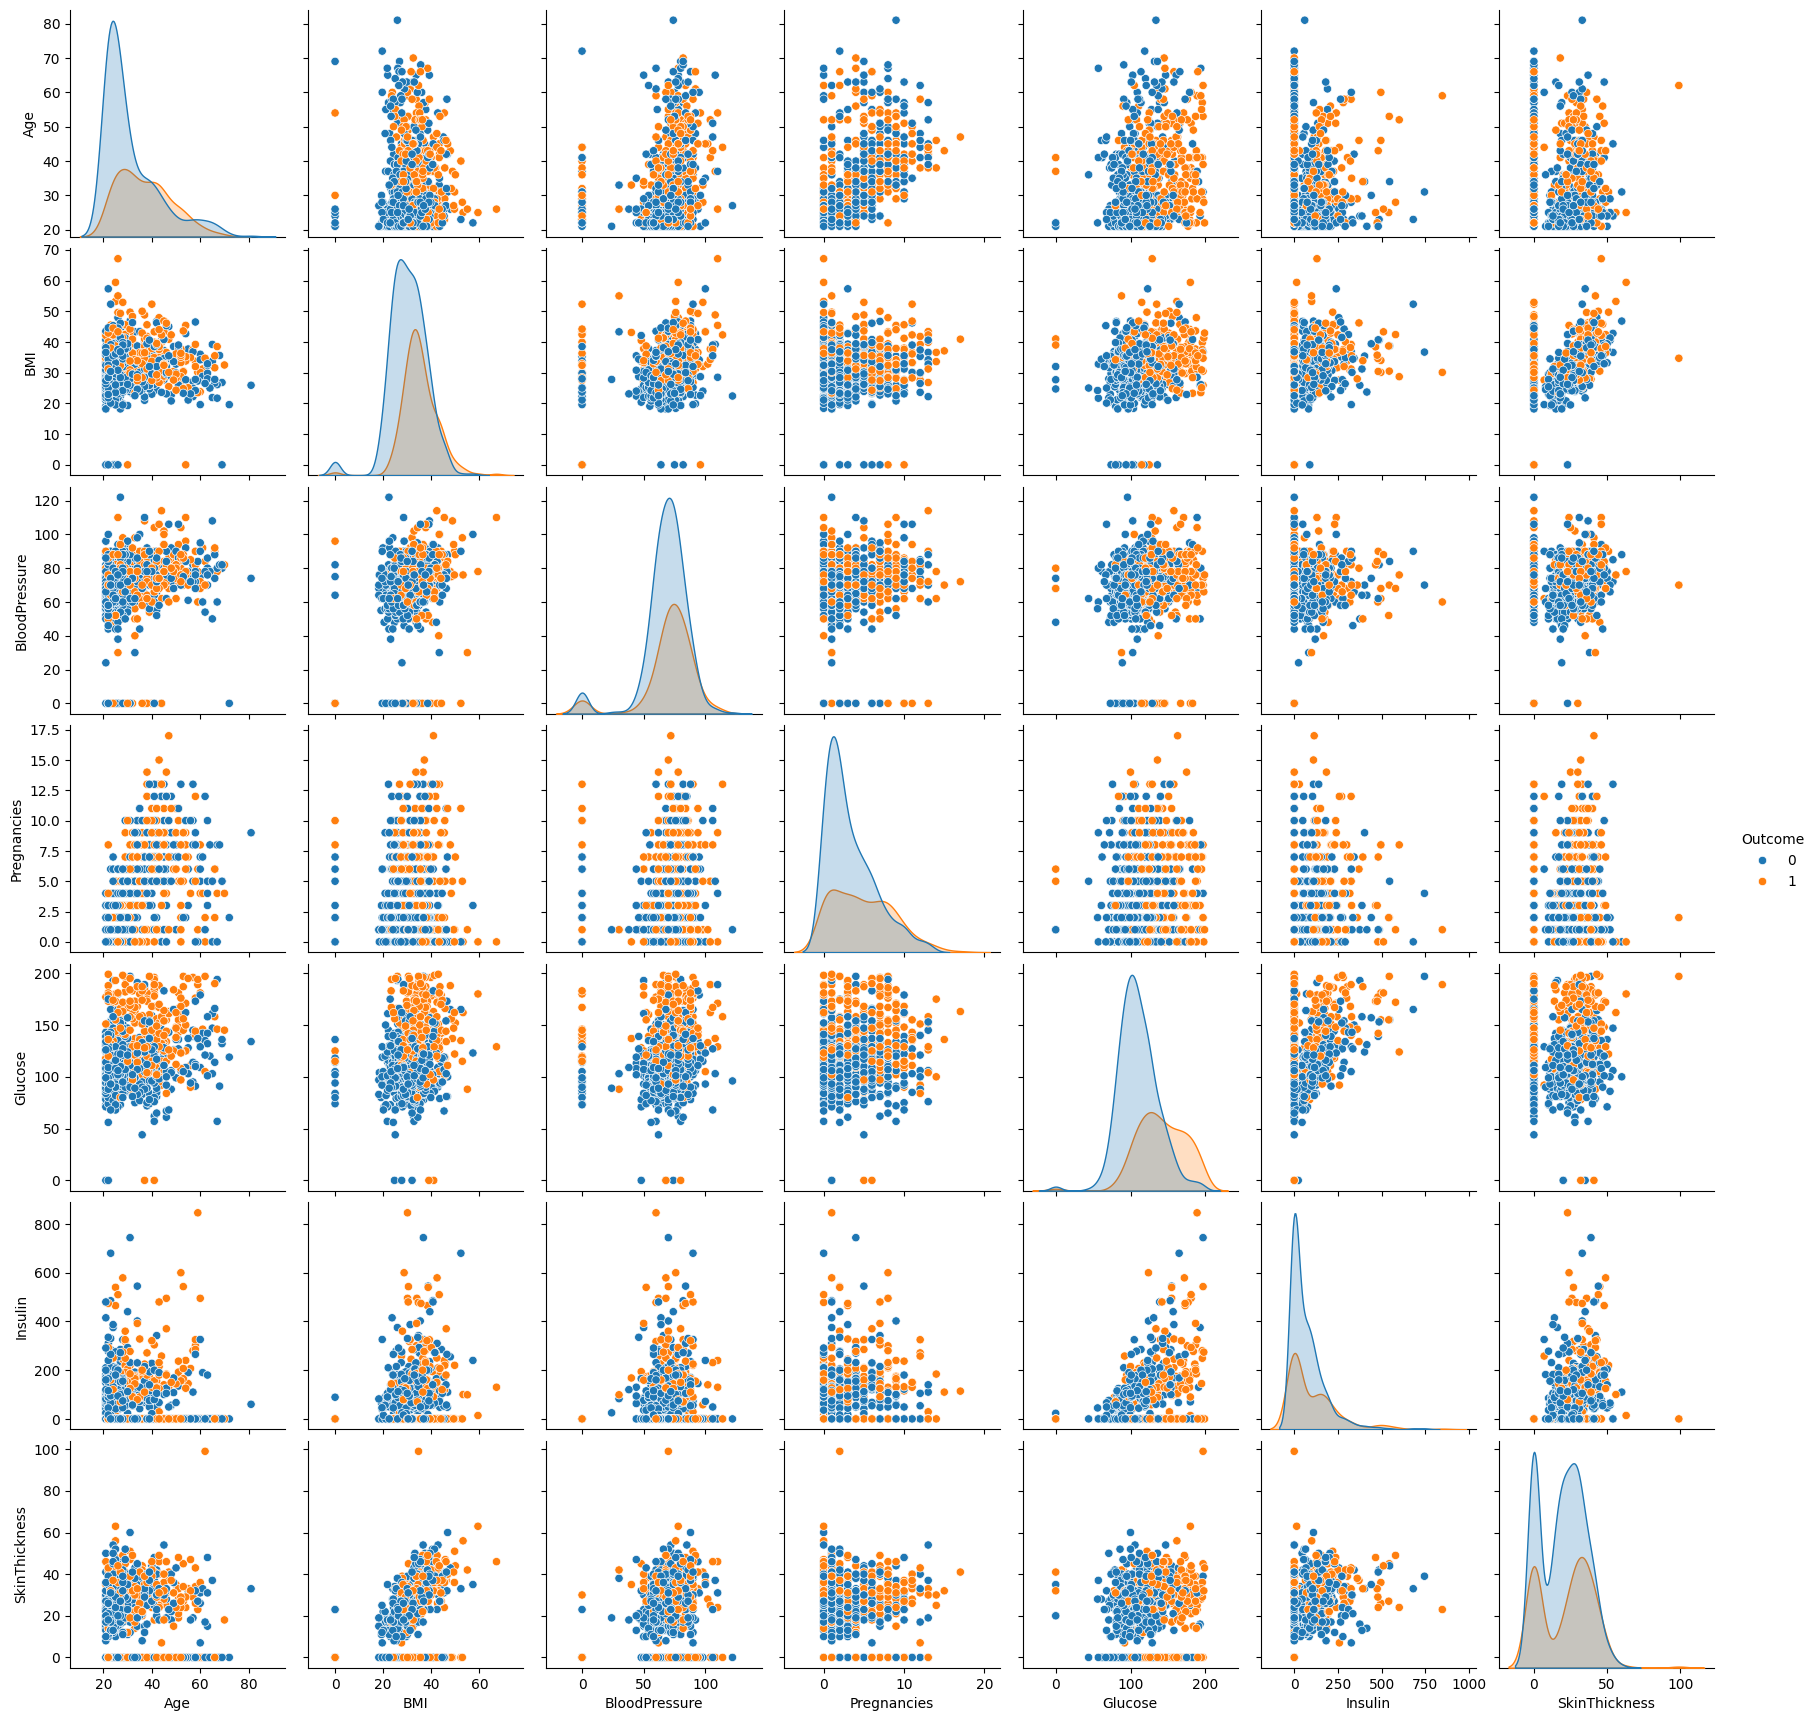

In [13]:
sns.pairplot(df,hue='Outcome',vars=['Age','BMI','BloodPressure','Pregnancies','Glucose','Insulin','SkinThickness'])

Text(0.5, 1.0, 'Count of diabetic and non-diabetic patients according to age ')

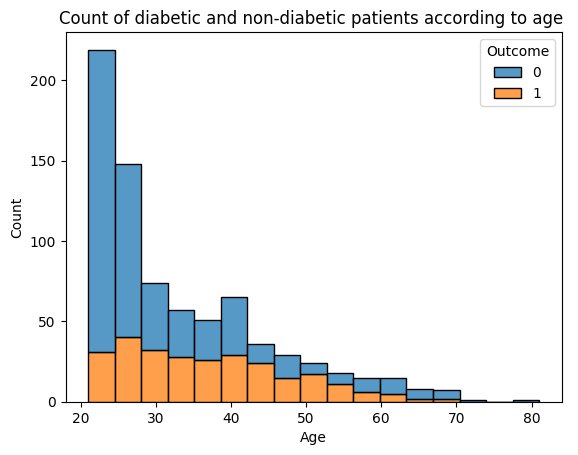

In [31]:
sns.histplot(df,x='Age',hue='Outcome',multiple='stack')
plt.title("Count of diabetic and non-diabetic patients according to age ")

### **Data Partitioning**

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Logistic Regression**

In [18]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)
y_pred
concatenated = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1)
print(concatenated)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [22]:
print("The accuracy of the LR model is :",accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

The accuracy of the LR model is : 0.7291666666666666
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       119
           1       0.65      0.62      0.63        73

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



### **Hyperparameter tuning** 

In [21]:
logreg = LogisticRegression(solver='liblinear', random_state=42)

p_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=logreg, param_grid=p_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


best_para = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_para}')

# Make predictions with the best model
y_pred1 = best_model.predict(X_test)

# Evaluate the tuned model
tuned_accuracy = accuracy_score(y_test, y_pred)
print(f'Tuned Logistic Regression Model Accuracy: {tuned_accuracy}')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Tuned Logistic Regression Model Accuracy: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



### **Conclusion** 

We can observe that the hypertuned Logistic Regression model has a better accuracy than the normal logistic regression model. So we can infer that our hyperparameter  tuning is successful.

## **Random Forest Classification**

In [23]:
rr = RandomForestClassifier(random_state=42)

In [24]:
rr.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [25]:
pred_y = rr.predict(X_test)
pred_y
concatenated = np.concatenate((pred_y.reshape(len(pred_y), 1), y_test.values.reshape(len(y_test), 1)), axis=1)
print(concatenated)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [27]:
print("The accuracy of the hypertuned LR model is:",accuracy_score(y_test,pred_y))
print(classification_report(y_test,pred_y))

The accuracy of the hypertuned LR model is: 0.7395833333333334
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       123
           1       0.63      0.67      0.65        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



## **Decision Tree Classifier**

In [34]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("\nDecision Tree:")
print(accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt))


Decision Tree:
0.703125
              precision    recall  f1-score   support

           0       0.81      0.71      0.75       123
           1       0.57      0.70      0.63        69

    accuracy                           0.70       192
   macro avg       0.69      0.70      0.69       192
weighted avg       0.72      0.70      0.71       192



### **Accuracy Comparison**

In [39]:
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'Decision Tree': accuracy_score(y_test, pred_dt),
    'Random Forest': accuracy_score(y_test, pred_y)
}

for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.2f}")

best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Model: {best_model} with accuracy {model_accuracies[best_model]:.2f}")

Logistic Regression Accuracy: 0.73
Decision Tree Accuracy: 0.70
Random Forest Accuracy: 0.74

Best Model: Random Forest with accuracy 0.74


##### As the best accuracy model is the Random Forest, so we will apply hyperparameter tuning to it.

### **Manual Search**

In [42]:
manual_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

best_acc = 0
best_params = {}

for n in manual_params['n_estimators']:
    for d in manual_params['max_depth']:
        for s in manual_params['min_samples_split']:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            if acc > best_acc:
                best_acc = acc
                best_params = {'n_estimators': n, 'max_depth': d, 'min_samples_split': s}

print(f"Best Manual Search Accuracy: {best_acc}")
print(f"Best Manual Search Parameters: {best_params}")

Best Manual Search Accuracy: 0.7604166666666666
Best Manual Search Parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2}


### **Random Search**

In [44]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print(f"Best Random Search Accuracy: {random_search.best_score_}")
print(f"Best Random Search Parameters: {random_search.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Random Search Accuracy: 0.7795138888888888
Best Random Search Parameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 20}


### **Grid Search**

In [45]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rr, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Grid Search Accuracy: {grid_search.best_score_}")
print(f"Best Grid Search Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Grid Search Accuracy: 0.7760416666666666
Best Grid Search Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


##### **Best model for hyperparameter tuning is the RandomSearch CV which gives the highest accuracy of 77.9% .**